# Text Data Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Bag of Words
- document-term matrix
- tf-idf

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [21]:
corpus = [
    'This is the first document',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?'
]

### document-term matrix

In [6]:
vect = CountVectorizer()
vect.fit_transform(corpus)

<4x10 sparse matrix of type '<class 'numpy.int64'>'
	with 22 stored elements in Compressed Sparse Row format>

In [10]:
print(vect.fit_transform(corpus)) # None zero terms

  (0, 9)	1
  (0, 4)	1
  (0, 7)	1
  (0, 3)	1
  (0, 2)	1
  (1, 9)	1
  (1, 4)	1
  (1, 7)	1
  (1, 2)	1
  (1, 6)	1
  (1, 1)	1
  (2, 9)	1
  (2, 4)	1
  (2, 7)	1
  (2, 0)	1
  (2, 8)	1
  (2, 5)	1
  (3, 9)	1
  (3, 4)	1
  (3, 7)	1
  (3, 3)	1
  (3, 1)	1


In [12]:
X = vect.fit_transform(corpus)
print(type(X))
X.toarray()

<class 'scipy.sparse.csr.csr_matrix'>


array([[0, 0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 1, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 0, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [13]:
# What kind of words in
vect.get_feature_names()

['and',
 'document',
 'documnet',
 'first',
 'is',
 'one',
 'second',
 'the',
 'third',
 'this']

### tf-idf

In [22]:
vect = TfidfVectorizer()
X = vect.fit_transform(corpus)
print(vect.get_feature_names())
X.toarray()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


array([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524],
       [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
        0.53864762, 0.28108867, 0.        , 0.28108867],
       [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
        0.        , 0.26710379, 0.51184851, 0.26710379],
       [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524]])

In [23]:
vect = TfidfVectorizer(ngram_range=[1,2], stop_words='english') # 영어에서 뻔한 단어로 지정한 것들을 제외
X = vect.fit_transform(corpus)
print(vect.get_feature_names())
X.toarray()

['document', 'document second', 'second', 'second document']


array([[1.        , 0.        , 0.        , 0.        ],
       [0.59329727, 0.46475741, 0.46475741, 0.46475741],
       [0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ]])

### practical example

In [24]:
!curl -L https://bit.ly/2WC9nvn -o spam.csv # -L: Link 있으면 가져오기

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   141  100   141    0     0    277      0 --:--:-- --:--:-- --:--:--   277

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0

  4  488k    4 24576    0     0  13205      0  0:00:37  0:00:01  0:00:36 13205
100  488k  100  488k    0     0   219k      0  0:00:02  0:00:02 --:--:-- 1262k


In [27]:
!type spam.csv

"type","text"
"ham","Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
"ham","Ok lar... Joking wif u oni..."
"spam","Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
"ham","U dun say so early hor... U c already then say..."
"ham","Nah I don't think he goes to usf, he lives around here though"
"spam","FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, 짙1.50 to rcv"
"ham","Even my brother is not like to speak with me. They treat me like aids patent."
"ham","As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"
"spam","WINNER!! As a valued network customer you have been selected to receivea 짙900 prize reward! To claim call 090617014

"ham","Hmmm... Guess we can go 4 kb n power yoga... Haha, dunno we can tahan power yoga anot... Thk got lo oso, forgot liao..."
"ham","Not really dude, have no friends i'm afraid :("
"spam","December only! Had your mobile 11mths+? You are entitled to update to the latest colour camera mobile for Free! Call The Mobile Update Co FREE on 08002986906"
"ham","Coffee cake, i guess..."
"ham","Merry Christmas to you too babe, i love ya *kisses*"
"ham","Hey... Why dont we just go watch x men and have lunch... Haha"
"ham","cud u tell ppl im gona b a bit l8 cos 2 buses hav gon past cos they were full & im still waitin 4 1. Pete x"
"ham","That would be great. We'll be at the Guild. Could meet on Bristol road or somewhere - will get in touch over weekend. Our plans take flight! Have a good week"
"ham","No problem. How are you doing?"
"ham","No calls..messages..missed calls"
"ham","Hi da:)how is the todays class?"
"ham","I'd say that's a good sign but, well, you know my track record at reading women

"ham","Jus came back fr lunch wif my sis only. U leh?"
"ham","How is your schedule next week? I am out of town this weekend."
"ham","Really good:)dhanush rocks once again:)"
"ham","Lmao ok I wont be needing u to do my hair anymore."
"ham","Miss ya, need ya, want ya, love ya."
"ham","Sorry i'm not free..."
"ham","Do u ever get a song stuck in your head for no reason and it won't go away til u listen to it like 5 times?"
"ham","Nt yet chikku..simple habba..hw abt u?"
"ham","Got ur mail Dileep.thank you so muchand look forward to lots of support...very less contacts here,remember one venugopal you mentioned.tomorrow if not late,i shall try to come up till there.goodnight dear."
"ham","Sometimes Heart Remembrs someone Very much... Forgets someone soon... Bcoz Heart will not like everyone. But liked ones will be Remembered Everytime... BSLVYL"
"ham","Joy's father is John. Then John is the NAME of Joy's father. Mandan"
"spam","Hi 07734396839 IBH Customer Loyalty Offer: The NEW NOKIA6600 Mobi

"ham","Lol boo I was hoping for a laugh"
"ham","""YEH I AM DEF UP4 SOMETHING SAT,JUST GOT PAYED2DAY & I HAVBEEN GIVEN A짙50 PAY RISE 4MY WORK & HAVEBEEN MADE PRESCHOOLCO-ORDINATOR 2I AM FEELINGOOD LUV"""
"ham","Well, I have to leave for my class babe ... You never came back to me ... :-( ... Hope you have a nice sleep, my love"
"ham","LMAO where's your fish memory when I need it?"
"ham","But i'll b going 2 sch on mon. My sis need 2 take smth."
"ham","Idea will soon get converted to live:)"
"spam","TheMob>Yo yo yo-Here comes a new selection of hot downloads for our members to get for FREE! Just click & open the next link sent to ur fone..."
"ham","S....s...india going to draw the series after many years in south african soil.."
"ham","Goodmorning, today i am late for  &lt;DECIMAL&gt; min."
"ham","Can't take any major roles in community outreach. You rock mel"
"ham","Shopping lor. Them raining mah hard 2 leave orchard."
"ham","Hi here. have birth at on the  to  at 8lb 7oz. Mother and baby

"ham","Mm not entirely sure i understood that text but hey. Ho. Which weekend?"
"ham","They released vday shirts and when u put it on it makes your bottom half naked instead of those white underwear."
"ham","Don know..he is watching film in computer.."
"ham","No b4 Thursday"
"ham","Oh, then your phone phoned me but it disconnected"
"ham","Id onluy matters when getting on from offcampus"
"spam","This message is free. Welcome to the new & improved Sex & Dogging club! To unsubscribe from this service reply STOP. msgs@150p 18+only"
"ham","Excellent, I'll see what riley's plans are"
"ham","I will see in half an hour"
"spam","You've won tkts to the EURO2004 CUP FINAL or 짙800 CASH, to collect CALL 09058099801 b4190604, POBOX 7876150ppm"
"ham","Ew are you one of them?"
"ham","Also hi wesley how've you been"
"ham","Ah you see. You have to be in the lingo. I will let you know wot on earth it is when has finished making it!"
"spam","Loan for any purpose 짙500 - 짙75,000. Homeowners + Tenants welcom

"ham","Yeah, probably earlier than that"
"ham","Change windows logoff sound.."
"ham","Still i have not checked it da. . ."
"ham","I'm also came to room."
"ham","Huh but i got lesson at 4 lei n i was thinkin of going to sch earlier n i tot of parkin at kent vale..."
"ham","Ok."
"ham","I will reach office around  &lt;DECIMAL&gt; . &amp; my mobile have problem. You cann't get my voice. So call you asa i'll free"
"ham","Cool, text me when you head out"
"spam","You are being contacted by our dating service by someone you know! To find out who it is, call from a land line 09050000878. PoBox45W2TG150P"
"spam","Wan2 win a Meet+Greet with Westlife 4 U or a m8? They are currently on what tour? 1)Unbreakable, 2)Untamed, 3)Unkempt. Text 1,2 or 3 to 83049. Cost 50p +std text"
"ham","Happy birthday... May u find ur prince charming soon n dun work too hard..."
"ham","Oh, the grand is having a bit of a party but it doesn't mention any cover charge so it's probably first come first served"
"ham","You s

"ham","Man this bus is so so so slow. I think you're gonna get there before me"
"ham","Hope this text meets you smiling. If not then let this text give you a reason to smile. Have a beautiful day."
"ham","In case you wake up wondering where I am, I forgot I have to take care of something for grandma today, should be done before the parade"
"ham","Ok"
"spam","Latest Nokia Mobile or iPOD MP3 Player +짙400 proze GUARANTEED! Reply with: WIN to 83355 now! Norcorp Ltd.짙1,50/Mtmsgrcvd18+"
"spam","SMS SERVICES. for your inclusive text credits, pls goto www.comuk.net login= 3qxj9 unsubscribe with STOP, no extra charge. help 08702840625.COMUK. 220-CM2 9AE"
"ham","Nvm take ur time."
"ham","So wat's da decision?"
"ham","Wot is u up 2 then bitch?"
"ham","Stupid.its not possible"
"ham","She told to hr that he want posting in chennai:)because i'm working here:)"
"spam","Mobile Club: Choose any of the top quality items for your mobile. 7cfca1a"
"ham","When are you guys leaving?"
"ham","He neva grumble 

"spam","Santa calling! Would your little ones like a call from Santa Xmas Eve? Call 09077818151 to book you time. Calls1.50ppm last 3mins 30s T&C www.santacalling.com"
"ham","Just come home. I don't want u to be miserable"
"ham","I dont know why she.s not getting your messages"
"ham","its cool but tyler had to take off so we're gonna buy for him and drop it off at his place later tonight. Our total order is a quarter, you got enough?"
"ham","The guy at the car shop who was flirting with me got my phone number from the paperwork and called and texted me. I'm nervous because of course now he may have my address. Should i call his boss and tell him, knowing this may get him fired?"
"ham","Reverse is cheating. That is not mathematics."
"ham","How do you plan to manage that"
"ham","Er, hello, things didn��쁳 quite go to plan ��� is limping slowly home followed by aa and with exhaust hanging off"
"ham","Sorry for the delay. Yes masters"
"ham","Call me when u finish then i come n pick u."
"spa

In [49]:
sms = pd.read_csv('./data/spam.csv', encoding='latin-1')
sms.head(3)

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [50]:
sms.columns = ['category', 'text']
sms.head(3)

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [51]:
sms['category'].value_counts()

ham     4827
spam     747
Name: category, dtype: int64

<AxesSubplot:ylabel='category'>

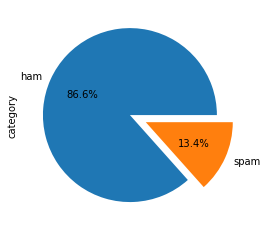

In [52]:
sms['category'].value_counts().plot(kind='pie', explode = [0, 0.2], autopct='%1.1f%%')

<AxesSubplot:>

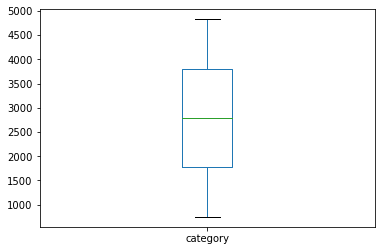

In [53]:
sms['category'].value_counts().plot(kind='box')

<AxesSubplot:>

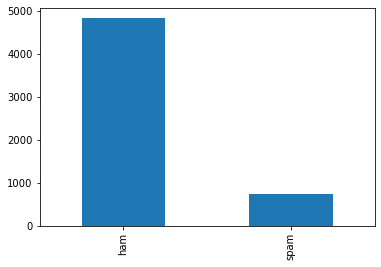

In [54]:
sms['category'].value_counts().plot(kind='bar')

In [55]:
sms.head()

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [56]:
# 최소한 10번 이상 등장하지 않은 것들은 토큰으로 인정하지 않는 것 (약자들 많이 사용)
# 사람이 주는 Parameter를 Hyper Parameter라고 하는데, 이것이 성능을 결정함
sms_corpus = sms['text']
vect = CountVectorizer(min_df=10, stop_words='english') # minimum document frequency, stop_words set english
X = vect.fit_transform(sms_corpus)
X.shape

(5574, 837)

In [59]:
vect.get_feature_names()

['00',
 '000',
 '03',
 '04',
 '0800',
 '08000839402',
 '08000930705',
 '10',
 '100',
 '1000',
 '10p',
 '11',
 '12',
 '12hrs',
 '150',
 '150p',
 '150ppm',
 '16',
 '18',
 '1st',
 '20',
 '200',
 '2000',
 '2003',
 '250',
 '2lands',
 '2nd',
 '2nite',
 '30',
 '350',
 '50',
 '500',
 '5000',
 '750',
 '800',
 '8007',
 '86688',
 '87066',
 '900',
 'abiola',
 'able',
 'abt',
 'ac',
 'account',
 'actually',
 'address',
 'admirer',
 'aft',
 'afternoon',
 'age',
 'ago',
 'ah',
 'aight',
 'alright',
 'amp',
 'angry',
 'ans',
 'answer',
 'anytime',
 'apply',
 'ard',
 'area',
 'asap',
 'ask',
 'askd',
 'asked',
 'asking',
 'ass',
 'attempt',
 'auction',
 'available',
 'await',
 'award',
 'awarded',
 'away',
 'awesome',
 'b4',
 'babe',
 'baby',
 'bad',
 'balance',
 'bank',
 'bath',
 'bathe',
 'bcoz',
 'beautiful',
 'bed',
 'believe',
 'best',
 'better',
 'big',
 'birthday',
 'bit',
 'blue',
 'bonus',
 'book',
 'booked',
 'bored',
 'bout',
 'box',
 'boy',
 'boytoy',
 'break',
 'bring',
 'brother',
 'bslvy

In [65]:
# 어떤 단어가 가장 많이 나왔을까 (가장 많이 나온 것은 뒤쪽에 있음)
iidx = X.toarray().sum(axis = 0).argsort()[-5:][::-1]
iidx

array([751, 373, 306, 426, 510], dtype=int64)

In [70]:
# 5 most frequently appeared words
[vect.get_feature_names()[i] for i in iidx]

['ur', 'just', 'gt', 'lt', 'ok']

### TfidfVectorizerm

In [77]:
vect =TfidfVectorizer(min_df=10, stop_words='english')
X = vect.fit_transform(sms_corpus)
X.shape

(5574, 837)

In [80]:
iidx = X.toarray().sum(axis = 0).argsort()[-5:][::-1]
print([vect.get_feature_names()[i] for i in iidx])
print([X.toarray().sum(axis=0)[i] for i in iidx]) # 값들

['ok', 'just', 'll', 'ur', 'come']
[122.06978727192575, 106.16332625717925, 96.57382567023429, 91.57779277147964, 87.15189392798636]


## word cloud

In [81]:
spam_sms = sms[sms['category'] == 'spam']['text']
ham_sms = sms[sms['category'] == 'ham']['text']

spam_words = []
ham_words = []

In [88]:
spam_sms # Series

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5539    Want explicit SEX in 30 secs? Ring 02073162414...
5542    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5549    Had your contract mobile 11 Mnths? Latest Moto...
5568    REMINDER FROM O2: To get 2.50 pounds free call...
5569    This is the 2nd time we have tried 2 contact u...
Name: text, Length: 747, dtype: object

In [92]:
spam_sms.values.shape

(747,)

In [95]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CheolHwang\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CheolHwang\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [98]:
for i in range(spam_sms.values.shape[0]):
    msg = spam_sms.values[i]
    words = [word.lower() for word in word_tokenize(msg)
                if word.lower() not in stopwords.words('english') and
                    word.lower().isalpha()] # stop word가 아니고 alphabet일 경우에만!!
    spam_words = spam_words + words

In [99]:
len(spam_words)

28341

In [101]:
# !pip install wordcloud

In [103]:
from wordcloud import WordCloud
wc = WordCloud(width=600, height=400)
spam_wordcloud = wc.generate("".join(spam_words))

plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

KeyboardInterrupt: 

## Word Embedding

In [105]:
!pip install gensim

  Created wheel for smart-open: filename=smart_open-3.0.0-py3-none-any.whl size=107101 sha256=4704fa282cce942af9af554add53e7eb313e83b4093764c60dad45f2bbf684b5
  Stored in directory: c:\users\cheolhwang\appdata\local\pip\cache\wheels\83\a6\12\bf3c1a667bde4251be5b7a3368b2d604c9af2105b5c1cb1870
Successfully built smart-open
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [106]:
from gensim.models.word2vec import Word2Vec

In [107]:
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
             ['this', 'is', 'the', 'second', 'sentence'],
             ['yet', 'another', 'sentence'],
             ['one', 'more', 'sentence'],
             ['and', 'the', 'final', 'sentence']]

In [135]:
model = Word2Vec(sentences, min_count=1, size=5)

In [136]:
print(model)

Word2Vec(vocab=14, size=5, alpha=0.025)


In [137]:
words = list(model.wv.vocab) # summarize the vocabulary
words

['this',
 'is',
 'the',
 'first',
 'sentence',
 'for',
 'word2vec',
 'second',
 'yet',
 'another',
 'one',
 'more',
 'and',
 'final']

In [138]:
# representation each words
model.wv['sentence','this'] # neural network 을 이용해 만든 vector

array([[ 0.01807678,  0.09260946,  0.08459437,  0.07474279,  0.01746082],
       [ 0.01480439,  0.04668554,  0.04352365, -0.09964947,  0.08829922]],
      dtype=float32)

In [139]:
# dim 5 -> dim 2 (dimension reduction)
from sklearn.decomposition import PCA

In [140]:
X = model.wv[model.wv.vocab]
pca = PCA(n_components=2) # reduce to 2-dim
result = pca.fit_transform(X)
result # reduced result vector

array([[ 0.04516217, -0.0869616 ],
       [ 0.03485405, -0.0319438 ],
       [-0.08655244,  0.02614977],
       [ 0.08203658,  0.12693034],
       [-0.10713768, -0.06473737],
       [-0.10917005, -0.02587956],
       [ 0.01823444,  0.07266457],
       [-0.07249799, -0.02715765],
       [-0.0664152 ,  0.0946911 ],
       [ 0.00297072, -0.04376734],
       [ 0.05686526,  0.03694352],
       [ 0.07136174, -0.0926296 ],
       [-0.01272692,  0.04803103],
       [ 0.14301531, -0.03233338]], dtype=float32)

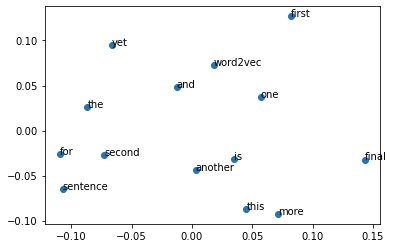

In [141]:
plt.scatter(result[:,0], result[:,1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i,0], result[i,1]))
    
plt.show()

In [142]:
model.wv.most_similar('word2vec')

[('yet', 0.7857638597488403),
 ('one', 0.6581078171730042),
 ('first', 0.5463242530822754),
 ('another', 0.5338971614837646),
 ('the', 0.35874393582344055),
 ('this', 0.2941874861717224),
 ('and', 0.26161468029022217),
 ('second', 0.07485535740852356),
 ('final', -0.007952027022838593),
 ('for', -0.0142295453697443)]

In [143]:
model.wv.similarity('word2vec', 'is') # 어떤 문장들이 유사한지 등을 판단할 수 있음

-0.27734762